In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0100"
SAVED_MODEL = "0001_0100-64-unet-xn3"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0174
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.8130

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)
#from tensorflow.keras.optimizers import RMSprop
#hyperparams.OPTIMIZER = RMSprop(learning_rate = 0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16836517306249914935
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4187553792
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15817003000327467957
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660, pci bus id: 0000:06:00.0, compute capability: 7.5"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=mean_absolute_error
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
                dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
                dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = \
                dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/
Noisy files:8086
Nitid files:8086
Read dataset. Path: E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/validation/
Noisy files:2000
Nitid files:2000


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 150 )

Epoch 1/200
506/506 [==============================] - 42s 58ms/step - loss: 0.1154 - val_loss: 0.1132
Epoch 2/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 3/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 4/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 5/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 6/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 7/200
506/506 [==============================] - 28s 56ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 8/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 9/200
506/506 [==============================] - 28s 55ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 10/200
506/506 [==============================] - 28s 55ms/step - l

Epoch 80/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 81/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 82/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 83/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 84/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 85/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 86/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 87/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 88/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 89/200
506/506 [==============================] - 27s 54ms

506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 159/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 160/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 161/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 162/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 163/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Epoch 164/200
506/506 [==============================] - 27s 54ms/step - loss: 0.1021 - val_loss: 0.1132
Train size:8086
Valid.size:2000
--- 4536.742080450058 seconds ---


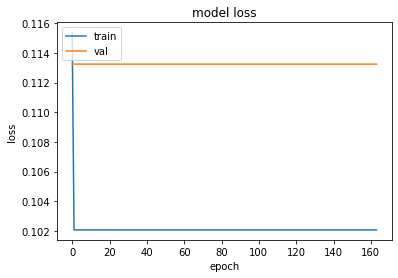

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

INFO:tensorflow:Assets written to: E:\Projects\VenusDenoise\saves\0001_0100-64-unet-xn3\assets


In [10]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =2000
Best RMSENZ  =536 (0.27)
Best MAENZ   =399 (0.20)
Best PSNR    =536 (0.27)
Best Accuracy=72 (0.04)
RMSE-NZ  Pred=0.1323  Noisy=0.1151
MAE-NZ   Pred=0.1268  Noisy=0.0945
PSNR     Pred=3.6 dB Noisy=5.1 dB
Accuracy Pred=0.06    Noisy=0.12
SSM      Pred=0.18    Noisy=0.18
HOG MSE  Pred=0.34    Noisy=0.15


In [11]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )

Read dataset. Path: E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test/
Noisy files:15
Nitid files:15
Index:0
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_noisy_idx068.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_06_00_0_nitid_idx076.tif


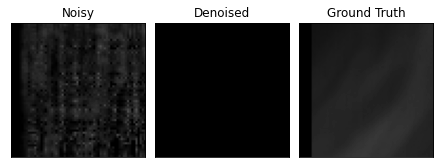

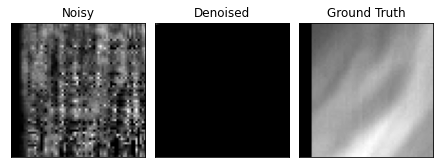

RMSE-NZ  Pred=0.1457  Noisy=0.0762 WORST
MAE-NZ   Pred=0.1424  Noisy=0.0607 WORST
PSNR     Pred=3.7 dB Noisy=9.3 dB WORST
Accuracy Pred=0.00    Noisy=0.11 WORST
SSM      Pred=0.01    Noisy=0.01
HOG MSE  Pred=0.15    Noisy=0.15
******************************************************
Index:1
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_noisy_idx068.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_00_9_nitid_idx076.tif


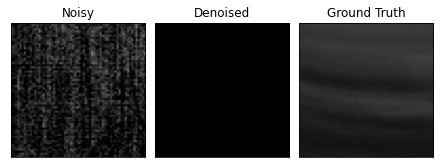

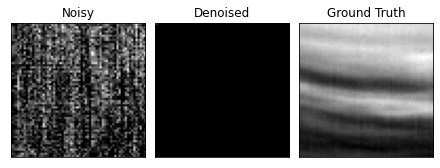

RMSE-NZ  Pred=0.1647  Noisy=0.1043 WORST
MAE-NZ   Pred=0.1564  Noisy=0.0869 WORST
PSNR     Pred=3.7 dB Noisy=7.7 dB WORST
Accuracy Pred=0.00    Noisy=0.06 WORST
SSM      Pred=0.01    Noisy=0.00
HOG MSE  Pred=0.27    Noisy=0.22
******************************************************
Index:2
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_11_nitid_idx076.tif


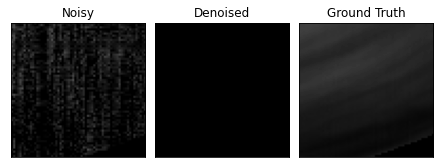

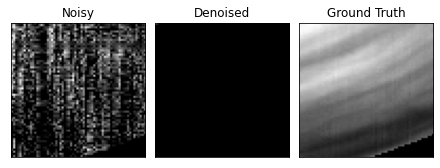

RMSE-NZ  Pred=0.1382  Noisy=0.0960 WORST
MAE-NZ   Pred=0.1261  Noisy=0.0800 WORST
PSNR     Pred=5.2 dB Noisy=8.4 dB WORST
Accuracy Pred=0.00    Noisy=0.06 WORST
SSM      Pred=0.04    Noisy=0.07
HOG MSE  Pred=0.32    Noisy=0.21
******************************************************
Index:3
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0025_07_01_2_nitid_idx076.tif


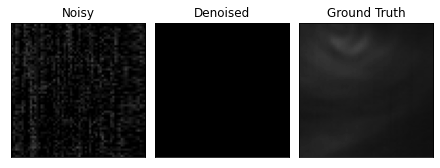

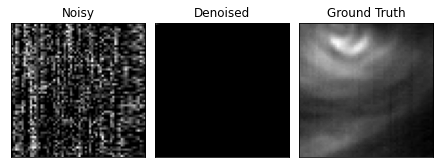

RMSE-NZ  Pred=0.1255  Noisy=0.0938 WORST
MAE-NZ   Pred=0.1201  Noisy=0.0805 WORST
PSNR     Pred=6.6 dB Noisy=9.1 dB WORST
Accuracy Pred=0.00    Noisy=0.06 WORST
SSM      Pred=0.01    Noisy=0.04
HOG MSE  Pred=0.48    Noisy=0.11
******************************************************
Index:4
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_noisy_idx068.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_00_15_nitid_idx076.tif


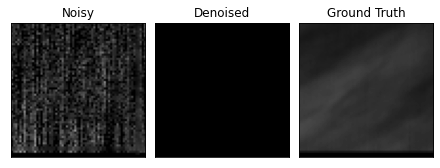

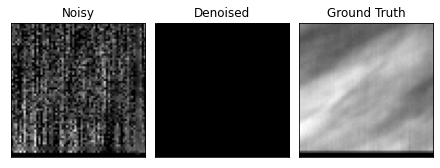

RMSE-NZ  Pred=0.1831  Noisy=0.1126 WORST
MAE-NZ   Pred=0.1779  Noisy=0.0917 WORST
PSNR     Pred=3.9 dB Noisy=8.1 dB WORST
Accuracy Pred=0.00    Noisy=0.07 WORST
SSM      Pred=0.03    Noisy=0.03
HOG MSE  Pred=0.30    Noisy=0.27
******************************************************
Index:5
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0361_04_01_7_nitid_idx076.tif


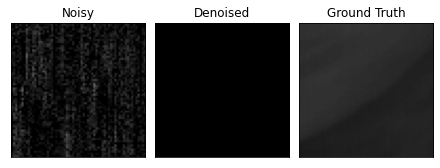

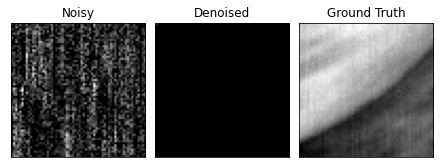

RMSE-NZ  Pred=0.1603  Noisy=0.1147 WORST
MAE-NZ   Pred=0.1579  Noisy=0.1006 WORST
PSNR     Pred=2.3 dB Noisy=5.2 dB WORST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.00    Noisy=0.02
HOG MSE  Pred=0.37    Noisy=0.19
******************************************************
Index:6
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0362_04_01_15_nitid_idx076.tif


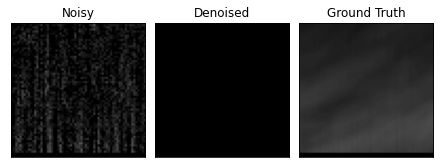

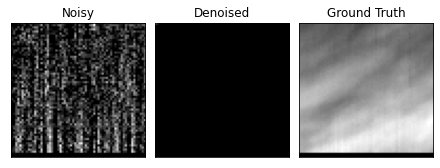

RMSE-NZ  Pred=0.1863  Noisy=0.1357 WORST
MAE-NZ   Pred=0.1792  Noisy=0.1172 WORST
PSNR     Pred=3.9 dB Noisy=6.6 dB WORST
Accuracy Pred=0.00    Noisy=0.04 WORST
SSM      Pred=0.03    Noisy=0.05
HOG MSE  Pred=0.27    Noisy=0.25
******************************************************
Index:7
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_noisy_idx068.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0363_00_00_0_nitid_idx076.tif


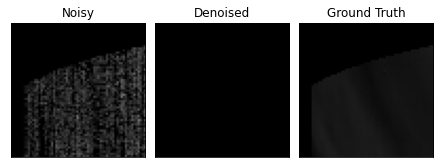

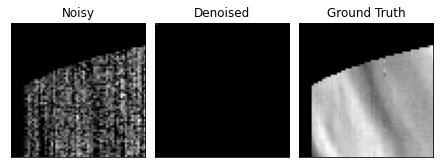

RMSE-NZ  Pred=0.0822  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0807  Noisy=0.0807 WORST
PSNR     Pred=3.0 dB Noisy=1.2 dB BEST
Accuracy Pred=0.00    Noisy=0.10 WORST
SSM      Pred=0.30    Noisy=0.30
HOG MSE  Pred=0.29    Noisy=0.08
******************************************************
Index:8
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_01_01_8_nitid_idx076.tif


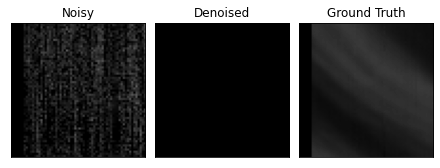

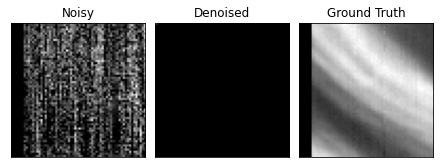

RMSE-NZ  Pred=0.1465  Noisy=0.0960 WORST
MAE-NZ   Pred=0.1362  Noisy=0.0792 WORST
PSNR     Pred=3.9 dB Noisy=7.5 dB WORST
Accuracy Pred=0.00    Noisy=0.07 WORST
SSM      Pred=0.02    Noisy=0.02
HOG MSE  Pred=0.31    Noisy=0.20
******************************************************
Index:9
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_02_01_9_nitid_idx076.tif


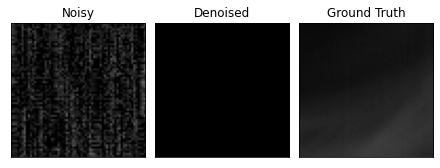

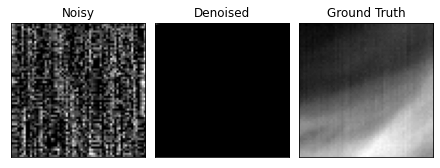

RMSE-NZ  Pred=0.1275  Noisy=0.0971 WORST
MAE-NZ   Pred=0.1158  Noisy=0.0798 WORST
PSNR     Pred=5.7 dB Noisy=8.0 dB WORST
Accuracy Pred=0.00    Noisy=0.07 WORST
SSM      Pred=0.01    Noisy=0.01
HOG MSE  Pred=0.42    Noisy=0.15
******************************************************
Index:10
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_noisy_idx068.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0567_03_00_9_nitid_idx076.tif


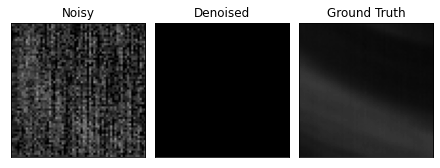

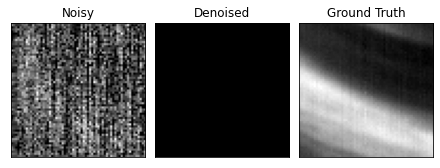

RMSE-NZ  Pred=0.1273  Noisy=0.1540 BEST
MAE-NZ   Pred=0.1116  Noisy=0.1226 BEST
PSNR     Pred=4.9 dB Noisy=3.3 dB BEST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.02    Noisy=0.00
HOG MSE  Pred=0.27    Noisy=0.19
******************************************************
Index:11
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0569_02_01_11_nitid_idx076.tif


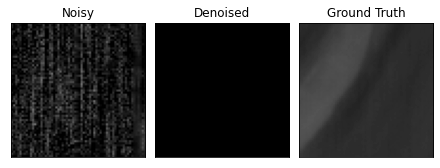

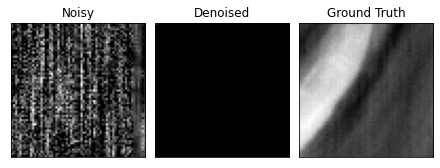

RMSE-NZ  Pred=0.2122  Noisy=0.1426 WORST
MAE-NZ   Pred=0.2056  Noisy=0.1207 WORST
PSNR     Pred=3.9 dB Noisy=7.4 dB WORST
Accuracy Pred=0.00    Noisy=0.04 WORST
SSM      Pred=0.00    Noisy=0.00
HOG MSE  Pred=0.29    Noisy=0.19
******************************************************
Index:12
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_02_01_10_nitid_idx076.tif


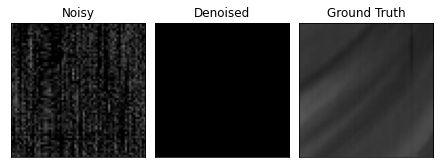

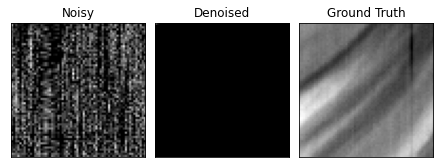

RMSE-NZ  Pred=0.2112  Noisy=0.1416 WORST
MAE-NZ   Pred=0.2080  Noisy=0.1219 WORST
PSNR     Pred=4.1 dB Noisy=7.5 dB WORST
Accuracy Pred=0.00    Noisy=0.04 WORST
SSM      Pred=0.00    Noisy=0.01
HOG MSE  Pred=0.30    Noisy=0.27
******************************************************
Index:13
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_noisy_idx068.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0571_03_00_11_nitid_idx076.tif


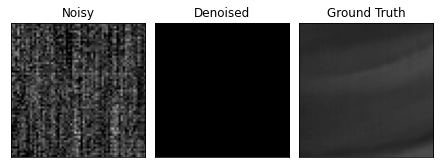

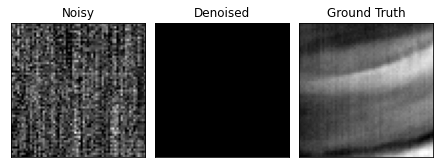

RMSE-NZ  Pred=0.1996  Noisy=0.1312 WORST
MAE-NZ   Pred=0.1972  Noisy=0.1051 WORST
PSNR     Pred=3.6 dB Noisy=7.2 dB WORST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.00    Noisy=0.00
HOG MSE  Pred=0.37    Noisy=0.18
******************************************************
Index:14
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_noisy_idx089.tif
E:/Projects/VenusDenoise/dataset/cases/64/0001_0100/test\VI0706_02_01_3_nitid_idx076.tif


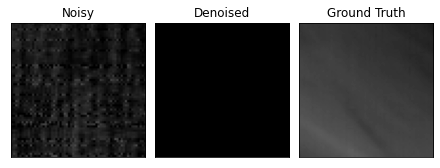

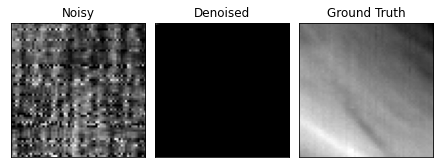

RMSE-NZ  Pred=0.2482  Noisy=0.1634 WORST
MAE-NZ   Pred=0.2435  Noisy=0.1488 WORST
PSNR     Pred=3.3 dB Noisy=7.0 dB WORST
Accuracy Pred=0.00    Noisy=0.01 WORST
SSM      Pred=0.00    Noisy=0.01
HOG MSE  Pred=0.42    Noisy=0.12
******************************************************


In [12]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )